In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

# Discrete Random Variables in Python

When a random variable has a known pmf, we say that it follows a **probability distribution** or just **distribution**. 
Distributions have names such as Bernoulli, Binomial, Poisson, etc.
Let's learn about the most common distributions and how to use them in Python.

## The Bernoulli distribution

The Bernoulli distribution generalizes the concept of a coin toss.
You can think of it as the result of an experiment with two possible outcomes, $0$ and $1$.
One needs to specify the probability of one of the outcomes, typically the probability of zero.
So, how do we denote mathematically a Bernoulli random variable $X$ that takes the value $1$ with probability $\theta$ in $[0,1]$?
We can write:

$$
X = \begin{cases} 1,\;\text{with probability}\;\theta,\\
0,\;\text{otherwise}.
\end{cases}
$$

Notice that in defining this random variable, we ignore the mechanism giving rise to it.
The other way we can write this like:

$$
X \sim \operatorname{Bernoulli}(\theta).
$$

```{note}
When you see the symbol $\sim$, you should think of it as "is distributed as."
So you read the above as "$X$ is distributed as Bernoulli with parameter $\theta$."
```

Let's use the functionality of ``scipy.stats`` to define a Bernoulli random variable and sample from it.

In [2]:
# Import the scipy.stats library
import scipy.stats as st
# This is the probability of success
theta = 0.6
# Define the random variable X as a Bernoulli random variable with theta
X = st.bernoulli(theta)

Here is the **support** of the random variable.
It tells you which values it takes:

In [3]:
print("X takes values in", X.support())

X takes values in (0, 1)


Evaluate the probability mass function at every point of the support:

In [4]:
for x in X.support():
    print(f"p(X={x}) = {X.pmf(x):.2f}")

p(X=0) = 0.40
p(X=1) = 0.60


The expectation of the Bernoulli:

In [5]:
print(f"E[X] = {X.expect():1.2f}")

E[X] = 0.60


The variance of the Bernoulli:

In [6]:
print(f"V[X] = {X.var():1.2f}")

V[X] = 0.24


Here is how to sample the random variable 10 times:

In [7]:
xs = X.rvs(size=10)
print(f"samples: {xs}")

samples: [0 1 1 1 1 1 1 1 1 0]


Let's plot the histogram of these samples (simply counts how many samples are zero or one):

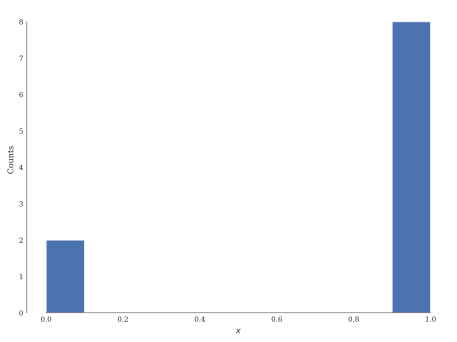

In [8]:
fig, ax = plt.subplots()
ax.hist(xs)
ax.set_xlabel("$x$")
ax.set_ylabel("Counts")
sns.despine(trim=True);

Compare the histogram to the graph of the probability mass function:

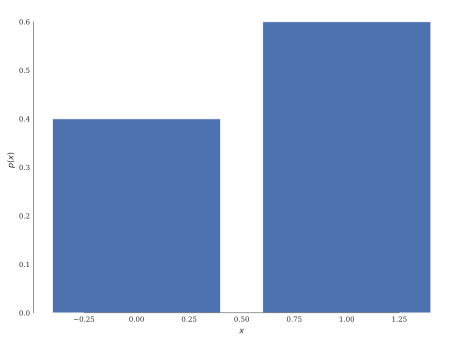

In [9]:
fig, ax = plt.subplots()
ax.bar(X.support(), X.pmf(X.support()))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
sns.despine(trim=True);

### Questions
+ Modify the code above to take 1,000 samples from the random variable instead of just 10.
+ Rerun the code above for $\theta = 0.8$.

## The Categorical distribution

The Categorical distribution is a generalization of the Bernoulli, also known as *multinulli*.
It is the probability distribution assigned to a random variable taking $K$ different values, each with a given but different probability.
It is:

$$
p(X=k) = p_k.
$$

For example, if all the different values are equally probable, then we could have:

$$
p(X=k) = \frac{1}{K}.
$$

Let's use the functionality of ``scipy.stats`` to define a Categorical random variable and sample from it.

In [10]:
import numpy as np
# Define the probabilities:
ps = [0.1, 0.3, 0.4, 0.2] 
# And here are the corresponding values
xs = np.array([1, 2, 3, 4])
# Here is how you can define a categorical rv:
X = st.rv_discrete(name="Custom Categorical", values=(xs, ps))

Here is how to sample from it 10 times:

In [11]:
x_samples = X.rvs(size=10)
print(f"samples: {x_samples}")

samples: [4 2 4 1 1 3 3 3 4 3]


Evaluate the probability mass function at a point $X=2$:

In [12]:
print(f"p(X=2) = {X.pmf(2):.2f}")

p(X=2) = 0.30


Here is the expectation:

In [13]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 2.70


And the variance:

In [14]:
print(f"V[X] = {X.var():.2f}")

V[X] = 0.81


Let's plot the PMF:

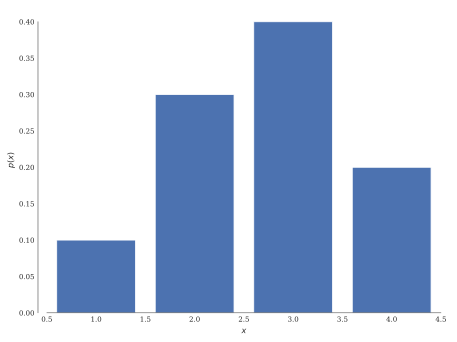

In [15]:
fig, ax = plt.subplots()
ax.bar(xs, X.pmf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
sns.despine(trim=True);

Let's now compute the expectation of a function of $X$.
Say, $Y = e^X$.
The formula is:

$$
\mathbb{E}[e^X] = \sum_x e^x p(x).
$$

Here is how you can do this sumation mannually:

In [16]:
E_eX = np.sum(np.exp(xs) * X.pmf(xs))
print(f"E[exp(X)] = {E_eX:.2f}")

E[exp(X)] = 21.44


What if we wanted to find the variance of $Y = e^X$.
We have to use this formula:

$$
\mathbb{V}[e^X] = \mathbb{E}\left[\left(e^{X}\right)^2\right] - \left\{\mathbb{E}\left[e^X\right]\right\}^2.
$$

Let's do it:

In [17]:
E_e2X = np.sum(np.exp(xs) ** 2 * X.pmf(xs))
V_eX = E_e2X - E_eX ** 2
print(f"V[exp(X)] = {V_eX:.2f}")

V[exp(X)] = 314.91


### Questions

+ Rerun all code segements above for the Categorical $X\sim \operatorname{Categorical}(0.1, 0.1, 0.4, 0.2, 0.2)$ taking values $1, 2, 3, 4$ and $5$.
+ Write code that finds the expectation of $\sin(X)$.
+ Write code that finds the variance of $\sin(X)$.

## The Binomial distribution

Suppose you toss $n$ times a coin with a probability of heads $\theta$ and let $X$ be the number of heads.
The random variable $X$ is called the binomial random variable.
We write:

$$
X\sim B(n, \theta).
$$

It is easy to show that its pmf is:

$$
p(X = k) = {n\choose{k}}\theta^k(1-\theta)^{n-k},
$$

where ${n\choose{k}}$ is the number of $k$ combinations out of $n$ elements:

$$
{n\choose{k}} = \frac{n!}{k!(n-k)!}.
$$

Here is how to define the binomial in scipy.stats:

In [18]:
n = 5       
theta = 0.6
X = st.binom(n, theta)

Here are some samples:

In [19]:
print(X.rvs(100))

[2 4 4 2 4 3 1 4 4 1 4 2 3 2 1 2 2 2 5 3 4 3 4 4 2 3 3 5 2 3 3 3 3 4 4 4 4
 4 2 4 3 3 5 2 3 5 4 2 3 4 4 2 4 3 3 2 3 3 2 5 3 2 5 4 4 3 2 5 3 2 2 3 5 4
 4 4 3 4 4 0 3 2 2 4 4 3 4 3 2 1 3 3 5 5 3 4 4 5 4 2]


Here is the expectation:

In [20]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 3.00


And the variance:

In [21]:
print(f"V[X] = {X.var():1.2f}")

V[X] = 1.20


Let's draw the PMF:

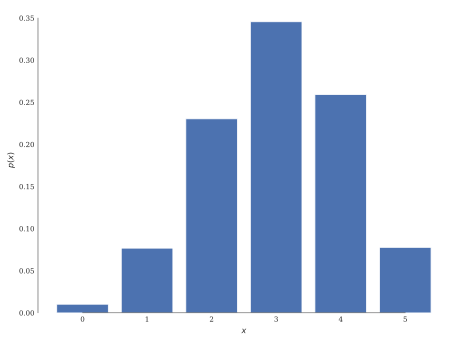

In [22]:
fig, ax = plt.subplots()
xs = range(n+1)
ax.bar(xs, X.pmf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
sns.despine(trim=True);

### Questions

+ Start increasing the number of trials $n$. Gradually take it up to $n=100$. How does the resulting pmf look like?
This starts to look like a bell curve. And indeed it is!

## The Poisson distribution

The Poisson distribution models the number of times an event occurs in an interval of space or time.
For example, a Poisson random variable $X$ may be:

+ The number of earthquakes greater than 6 Richter occurring over the next 100 years.
+ The number of major floods over the next 100 years.
+ The number of patients arriving at the emergency room during the night shift.
+ The number of electrons hitting a detector in a specific time interval.

The Poisson is a good model when the following assumptions are true:
+ The number of times an event occurs in an interval takes values $0,1,2,\dots$.
+ Events occur independently.
+ The probability that an event occurs is constant per unit of time.
+ The average rate at which events occur is constant.
+ Events cannot occur at the same time.

When these assumptions are valid, we can write:

$$
X\sim \operatorname{Pois}(\lambda),
$$

where $\lambda>0$ is the rate at which the events occur.
The pmf of the Poisson is:

$$
p(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}.
$$

The expectation of the Poisson is:

$$
\mathbb{E}[X] = \sum_{k=0}^\infty k p(X=k) = \lambda.
$$

The variance is:

$$
\mathbb{V}[X] = \dots = \lambda.
$$

Let's look at a specific example.
Historical data show that a major earthquake occurs once every 100 years on average in a given region.
What is the probability that $k$ such earthquakes will occur within the next 100 years?
Let $X$ be the random variable corresponding to the number of earthquakes over the next 100 years.
Assuming the Poisson model is valid, the rate parameter is $\lambda = 1$, and we have:

$$
X\sim \operatorname{Pois}(1).
$$

The probabilities are:

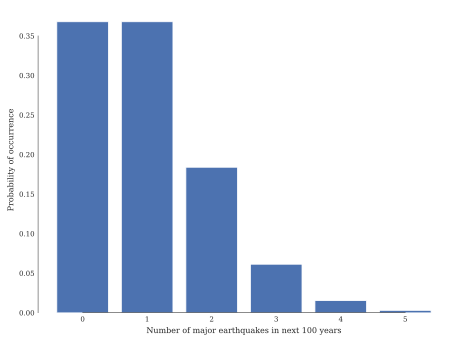

In [23]:
X = st.poisson(1.0)
ks = range(6)
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks))
ax.set_xlabel('Number of major earthquakes in next 100 years')
ax.set_ylabel('Probability of occurrence')
sns.despine(trim=True);


### Questions

+ How would the rate parameter $\lambda$ change if the rate with each major earthquake occurred in the past was two every 100 years? Plot the pmf of the new Poisson random variable. You may have to add more points to the x-axis.

```{admonition} Answer
:class: dropdown
The parameter would be $\lambda = 2$.
```